<a href="https://colab.research.google.com/github/faaizali124/DEP/blob/main/Machine_Learning_Internship_Task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [56]:
file = pd.read_csv("/content/spam.csv")

In [58]:
file.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [59]:
file["spam"] = file["Category"].apply(lambda x:1 if x == "spam" else 0)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(file.Message, file.spam, test_size = 0.1, random_state=42)

In [62]:
x_train.describe()

,Message
count,5014
unique,4664
top,"Sorry, I'll call later"
freq,26


In [63]:
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)
x_test_count = cv.transform(x_test.values)

In [64]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_count, y_train)

MultinomialNB()

In [66]:
y_pred_nb = nb_classifier.predict(x_test_count)

In [67]:
y_pred_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

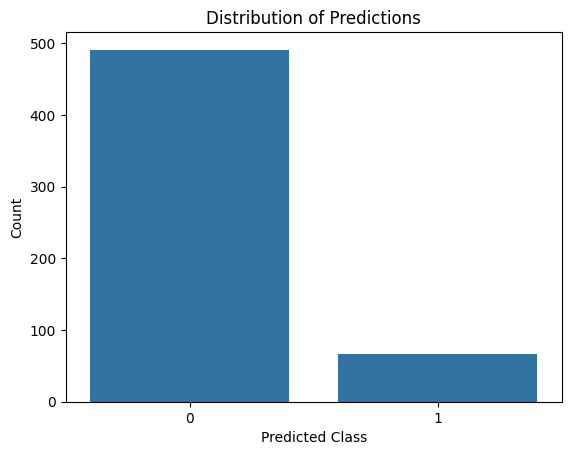

In [68]:
sns.countplot(x = y_pred_nb)
plt.title("Distribution of Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()

In [69]:
nb_accuracy_score = accuracy_score(y_test, y_pred_nb)
nb_classification_report = classification_report(y_test, y_pred_nb)

print("Naive Bayes Classifier:")
print("Accuracy: ", nb_accuracy_score)
print("Classification Report:\n",nb_classification_report)

Naive Bayes Classifier:
Accuracy:  0.989247311827957
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       485
           1       1.00      0.92      0.96        73

    accuracy                           0.99       558
   macro avg       0.99      0.96      0.98       558
weighted avg       0.99      0.99      0.99       558



In [70]:
svm_classifier = SVC(kernel = "linear", random_state = 42)
svm_classifier.fit(x_train_count, y_train)

SVC(kernel='linear', random_state=42)

In [71]:
y_pred_svm = svm_classifier.predict(x_train_count)

In [72]:
x_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
y_pred_svm = svm_classifier.predict(x_test_count)

In [74]:
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

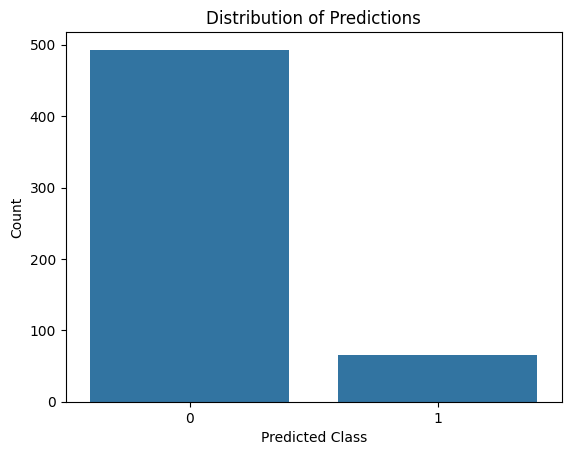

In [75]:
sns.countplot(x = y_pred_svm)
plt.title("Distribution of Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()


In [83]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)

print("SVM Classifier:")
print("Accuracy: ", svm_accuracy)
print("Classification Report:\n", svm_classification_report)

SVM Classifier:
Accuracy:  0.982078853046595
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       485
           1       0.98      0.88      0.93        73

    accuracy                           0.98       558
   macro avg       0.98      0.94      0.96       558
weighted avg       0.98      0.98      0.98       558



In [79]:
model_performance = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM'],
    'Accuracy': [nb_accuracy_score, svm_accuracy]
})

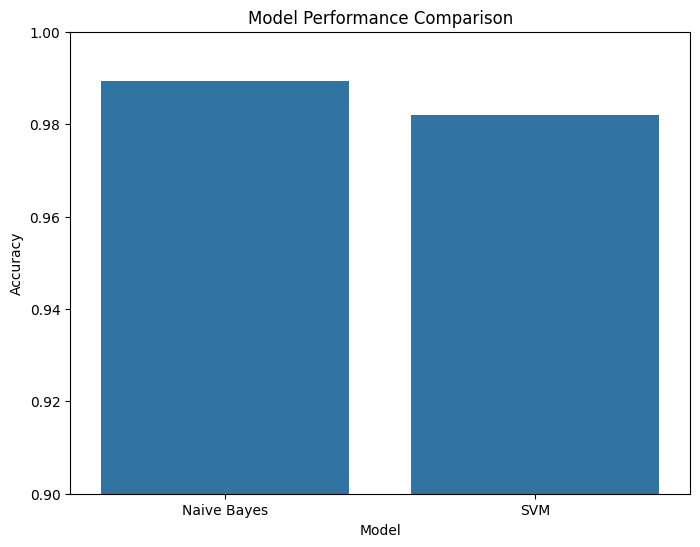

In [82]:
plt.figure(figsize = (8,6))
sns.barplot(data = model_performance, x = "Model", y = "Accuracy")
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()